## ABOUBAKAR Ouattara

## Théorème de Girsanov


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Question 1



On a $S_T = S_0 \exp \left( (r - \frac{\sigma^2}{2}) T + \sigma B_T \right)$

De fait:
$$
\Delta_0 = \mathbb{P}(S_T \geq K)
$$

$B :$ Mouvement Brownien

L'estimateur de $\Delta_0$ est donné par:
$$
\Delta_0 = \frac{1}{m} \sum_{i=0}^{m} \mathbb{1}_{\{ S_{T}^{(i)} \geq K \}}
$$

estimer par Monte Carlo sous $\mathbb{P}$



In [2]:
T=2
K = 150
S0 = 100
r =0.02
sigma = 0.4
m = 10**6
# Simulation de S_T sous P
BT = np.sqrt(T)*np.random.normal(0, 1, m)

ST = S0*np.exp((r - 0.5*sigma**2)*T + sigma*BT )
# estiomation de Delta

ES_P = np.mean(ST >= K)

print("Estimation de Delat0 sous P par Monte Carlo est:")
print(ES_P)

Estimation de Delat0 sous P par Monte Carlo est:
0.17617


## Question 2



On a 
$dQ^{\theta} = Z^{\theta}dP$
avec 

$Z^{\theta} = \exp \left( \theta B_t - \frac{1}{2} \theta^2 t \right)$

et 
$B_t^\theta  = B_t - \theta t$

L'estimateur de $\Delta_0$ par Monte Carlo sous $\mathbb{Q^\theta}$ est:
$$
\hat{\Delta}_0 = \frac{1}{m} \sum_{i=0}^{m} \frac{1}{Z_i^{\theta}} \mathbb{1}_{\{ S_{T}^{(i)} \geq K \}}
$$



In [3]:
def MC_delta(theta, m):
    T=2
    K = 150
    S0 = 100
    r =0.02
    sigma = 0.4
    # simulation de Bt
    BT_theta = np.sqrt(T)*np.random.normal(0, 1, m)

    # simulation de ST sous Q:
    BT = BT_theta  + theta*T
    Z_theta = np.exp(theta*BT - 0.5*(theta**2)*T)

    ST = S0*np.exp((r - 0.5*sigma**2)*T + sigma*BT )

    # simulateur de MC sous Q

    ES = np.mean((1/Z_theta)*(ST>=K))

    return ES

In [4]:
print("Estimation de Delat0 sous Q par Monte Carlo pour theta =3, m = 10**5 est:")
print(MC_delta(3, 10**5))

Estimation de Delat0 sous Q par Monte Carlo pour theta =3, m = 10**5 est:
0.1840641059677434


## Question 3 


Calculons la valeur exacte de $Δ_0$
$$
\Delta_0 = P(S_T \geq K) = P \left( B_T \geq \frac{\ln(K/S_0) - (r - 0.5 \sigma^2) T}{\sigma} \right)
$$

En utilisant la distribution normale, cela devient :
$$
\Delta_0 = 1 - \Phi \left( \frac{\ln(K/S_0) - (r - 0.5 \sigma^2) T}{\sigma \sqrt{T}} \right)
$$

0.1764704945792922


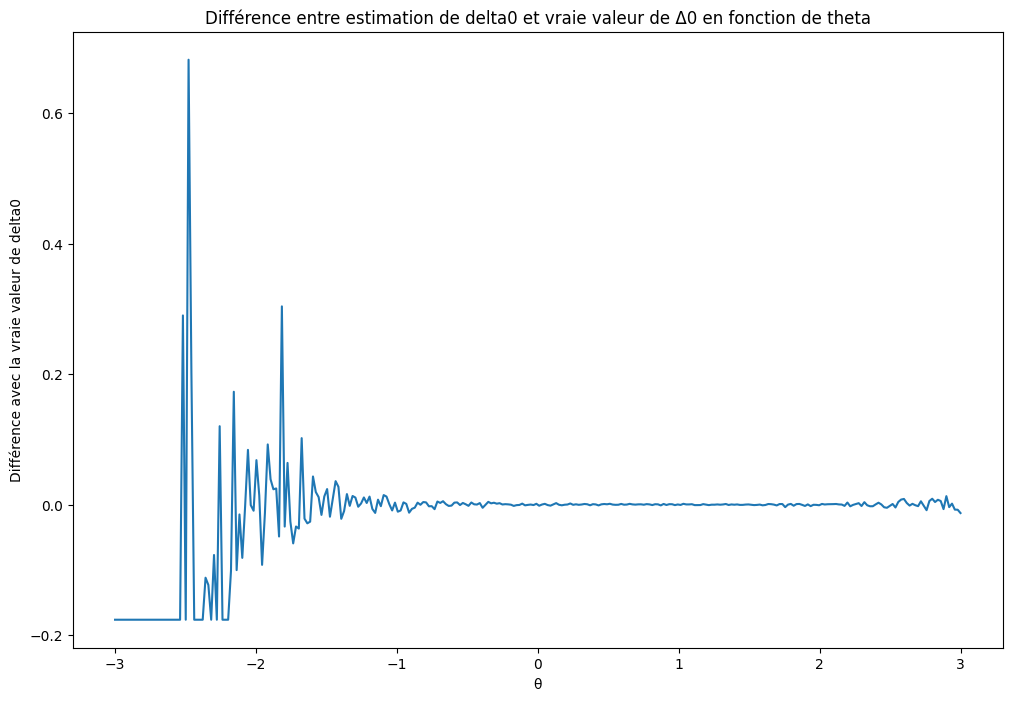

In [5]:
# Calculons delta exacte

d = (np.log(K / S0) - (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
true_Delta_0 = 1 - norm.cdf(d)

theta = np.linspace(-3, 3, 300)

ES = [MC_delta(t, 10**5) for t in theta]

diff = [es - true_Delta_0 for es in ES]

print(true_Delta_0)
#print(diff)
plt.figure(figsize=(12, 8))
plt.plot(theta, diff)
plt.xlabel("θ")
plt.ylabel("Différence avec la vraie valeur de delta0")
plt.title("Différence entre estimation de delta0 et vraie valeur de Δ0 en fonction de theta")
plt.show()

## Question 4

Un estimateur de $\mathbb{Var(\theta)}$ est: 
$$
-\hat{\Delta}_0^2 + \frac{1}{m}\sum_{i=0}^{m} \frac{1}{(Z_i^{\theta})^2} \mathbb{1}_{\{ S_{T}^{(i)} \geq K \}}
$$
Ou:
$$
\hat{\Delta}_0 = \frac{1}{m} \sum_{i=0}^{m} \frac{1}{Z_i^{\theta}} \mathbb{1}_{\{ S_{T}^{(i)} \geq K \}}
$$

In [6]:
def ESVar(theta, m):
    ES = MC_delta(theta, m)
    T=2
    K = 150
    S0 = 100
    r =0.02
    sigma = 0.4
    # simulation de Bt
    BT_theta = np.sqrt(T)*np.random.normal(0, 1, m)

    # simulation de ST sous Q:
    BT = BT_theta + theta*T
    Z_theta = np.exp(theta*BT - 0.5*(theta**2)*T)

    ST = S0*np.exp((r - 0.5*sigma**2)*T + sigma*BT )
    
    # simulateur de Var sous Q

    Var = np.mean((1/Z_theta**2)*(ST>=K)) - ES**2
    return Var

## Question 5 

Traçons $\mathbb{Var(\theta)}$ en fonction de $\theta$

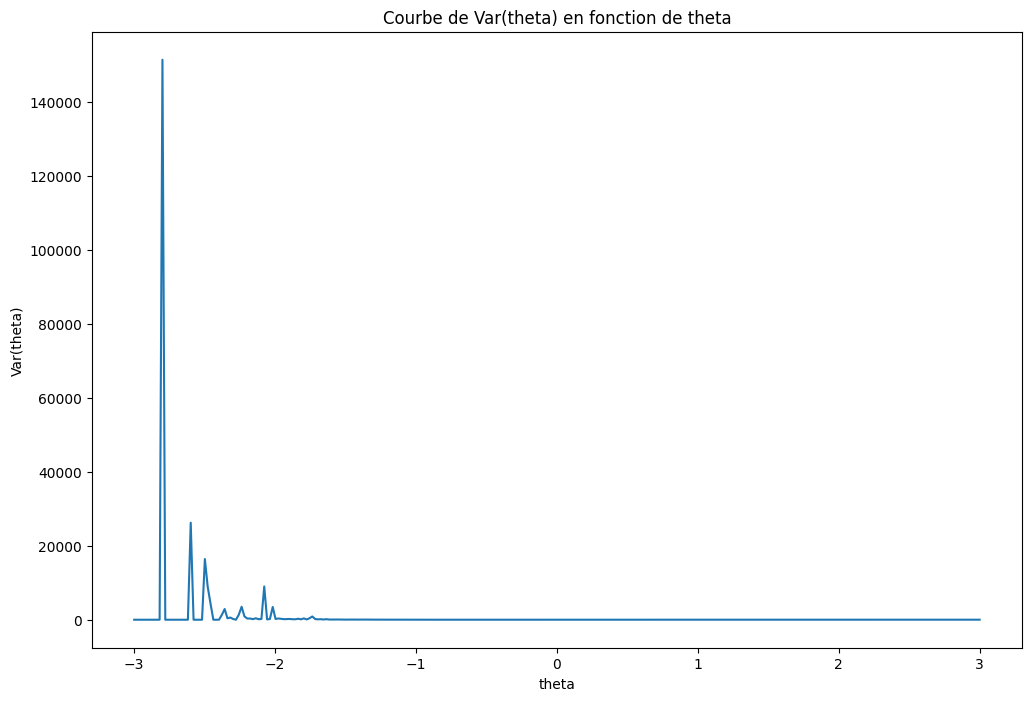

In [7]:
thetas = np.linspace(-3, 3, 300)

var = [ESVar(theta, 10**5) for theta in thetas]
#print(var)
plt.figure(figsize=(12, 8))
plt.plot(thetas, var)
plt.xlabel("theta")
plt.ylabel("Var(theta)")
plt.title("Courbe de Var(theta) en fonction de theta")
plt.show()

L'on remarque que la variance de l'estimateur se stabilise autour de $0$ avec des valeurs de $\theta $ de plus grand, Notons egalement que la difference entre la vrai valeur de $\Delta_0 $ et son estimation en fonction de $\theta$  tends egalement vers $0$ pour des $\theta$ grand. Il faut donc choisi $\theta$ de sorte aminimiser la variance